In [14]:
# Importamos la libreria de Python 'fastf1'
import fastf1 as f1
import fastf1.plotting
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Cargamos el cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

In [3]:
# Cargamos los datos del Gran Prix Italy 2024
sesion = f1.get_session(2024, 16, 'R')

# Mostramos sesion, nombre y fecha de la carrera
print(sesion.name)
print(sesion.date)

Race
2024-09-01 13:00:00


In [4]:
sesion.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/16/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\Laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 1

In [35]:
vueltas = sesion.laps
resultados = sesion.results

In [58]:
# Extraer tiempos de vuelta y pilotos
datos_vueltas = vueltas[['Driver', 'LapTime']]

# Mapear los nombres de los pilotos
datos_vueltas['Driver'] = datos_vueltas['Driver'].map(resultados.set_index('Abbreviation')['FullName'])

# Agregar el nombre del equipo desde los resultados
datos_vueltas['TeamName'] = datos_vueltas['Driver'].map(resultados.set_index('FullName')['TeamName'])

# Asegúrate de que LapTime es del tipo correcto
datos_vueltas['LapTime'] = datos_vueltas['LapTime']

C:\Users\Laura\AppData\Local\Temp\ipykernel_9732\2848553646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_vueltas['Driver'] = datos_vueltas['Driver'].map(resultados.set_index('Abbreviation')['FullName'])
C:\Users\Laura\AppData\Local\Temp\ipykernel_9732\2848553646.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_vueltas['TeamName'] = datos_vueltas['Driver'].map(resultados.set_index('FullName')['TeamName'])
C:\Users\Laura\AppData\Local\Temp\ipykernel_9732\2848553646.py:11: SettingWithCopy

In [61]:
# Definir la paleta de colores personalizada
colores_equipo = {
    'Ferrari': '#FF0000',          
    'McLaren': '#FF6F00',          
    'Mercedes': '#32FF7F',        
    'Red Bull Racing': '#0F1A6D',        
    'Williams': '#003FFF',        
    'Haas F1 Team': '#FFFFFF',             
    'Aston Martin': '#004F00',    
    'RB': '#00B2FF',              
    'Alpine': '#FF69B4',          
    'Kick Sauber': '#00FF00',           
}

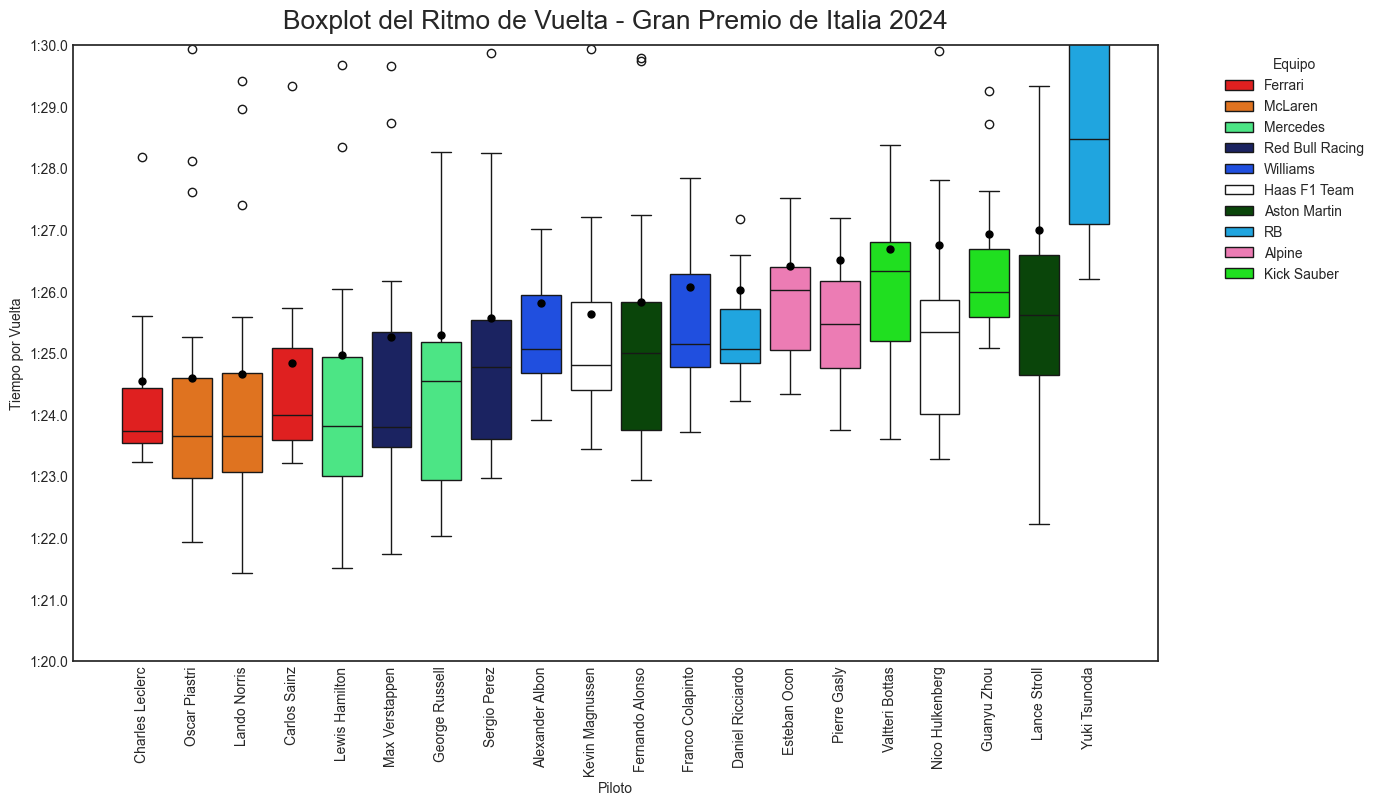

In [85]:
# Crear un boxplot del ritmo de vuelta por piloto
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme=None)
plt.style.use('seaborn-v0_8-white')  # Estilo con fondo blanco y cuadrícula

plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Driver', y='LapTime', hue='TeamName', data=datos_vueltas, palette=colores_equipo)
plt.xticks(rotation=90)  # Rotar los nombres de los pilotos para mejor visibilidad
plt.xlabel('Piloto')
plt.ylabel('Tiempo por Vuelta')
plt.title('Boxplot del Ritmo de Vuelta - Gran Premio de Italia 2024')

# Invertir el eje Y
ax.invert_yaxis()

# Limitar el rango del eje Y
plt.ylim(pd.Timedelta(minutes=1, seconds=20), pd.Timedelta(minutes=1, seconds=30))

# Calcular la media de los tiempos de vuelta para cada piloto
media_vueltas = datos_vueltas.groupby('Driver')['LapTime'].mean().reset_index()
media_vueltas.rename(columns={'LapTime': 'MediaLapTime'}, inplace=True)

# Agregar las líneas discontinuas para la media de cada piloto
for driver in media_vueltas['Driver']:
    media_time = media_vueltas[media_vueltas['Driver'] == driver]['MediaLapTime'].values[0]
    # Dibujar línea discontinua para la media con zorder alto
    ax.axhline(y=media_time, color='black', linestyle='--', linewidth=1, zorder=10)

# Agregar puntos para la media si es necesario
for driver in media_vueltas['Driver']:
    media_time = media_vueltas[media_vueltas['Driver'] == driver]['MediaLapTime'].values[0]
    ax.plot(driver, media_time, marker='o', color='black', markersize=5, zorder=20)

# Ajustar la leyenda si es necesario
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [70]:
media_vueltas

,Driver,MediaLapTime
0,Alexander Albon,0 days 00:01:25.814773584
1,Carlos Sainz,0 days 00:01:24.836754716
2,Charles Leclerc,0 days 00:01:24.542018867
3,Daniel Ricciardo,0 days 00:01:26.022245283
4,Esteban Ocon,0 days 00:01:26.411269230
5,Fernando Alonso,0 days 00:01:25.834377358
6,Franco Colapinto,0 days 00:01:26.076132075
7,George Russell,0 days 00:01:25.291358490
8,Guanyu Zhou,0 days 00:01:26.938115384
9,Kevin Magnussen,0 days 00:01:25.642056603
